In [1]:
#从 booksforcharlie/stable-diffusion-inpainting 加载预训练模型

pretrained_model_name_or_path = "booksforcharlie/stable-diffusion-inpainting"

from diffusers import AutoencoderKL, UNet2DConditionModel
from diffusers.schedulers import DDPMScheduler
from PIL import Image
import matplotlib.pyplot as plt
from unet_adapter import adapt_unet_with_catvton_attn

vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse")
unet = UNet2DConditionModel.from_pretrained(pretrained_model_name_or_path, subfolder="unet")   
noise_scheduler = DDPMScheduler.from_pretrained(pretrained_model_name_or_path, subfolder="scheduler")



/home/nervld/miniconda3/envs/lora/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/nervld/miniconda3/envs/lora/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/nervld/miniconda3/envs/lora/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
An error occurred while trying to fetch booksforcharlie/stable-diffusion-inpainting: booksforcharlie/stable-diffusion-inpainting does not appear to have a file named diffusion_pytorch_model.safe

In [ ]:
print("=================UNet原始结构：===============")

print(unet)

print("=============================================")

adapt_unet_with_catvton_attn(
    unet = unet,
    catvton_attn_path=None,
    trainable_modules="attention"
)

print("=================UNet修改后的结构：===============")
print(unet)

print("=============================================")


=================UNet原始结构：===============
UNet2DConditionModel(
  (conv_in): Conv2d(9, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
            

100%|██████████| 50/50 [00:25<00:00,  1.95it/s]


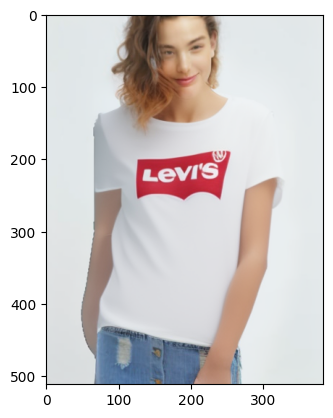

In [6]:
import sys
if sys.modules.__contains__('catvton_base_infer') :
    del sys.modules['catvton_base_infer']
from catvton_base_infer import run_inference

# 正常的inpaint model使用warped_masked_real_image
real_image_path = "/home/nervld/gitclone/diffusers/data/catvton/real_images/00000_00.jpg"
real_mask_path = "/home/nervld/gitclone/diffusers/data/catvton/real_masks/00000_00.jpg"
condition_image_path = "/home/nervld/gitclone/diffusers/data/catvton/condition_images/00000_00.jpg"

image = Image.open(real_image_path)
mask = Image.open(real_mask_path)
condition_image = Image.open(condition_image_path)

image = run_inference(unet, vae, noise_scheduler, image=image, mask=mask, condition_image=condition_image)
# 可视化
plt.imshow(image[0])
plt.show()

100%|██████████| 50/50 [00:26<00:00,  1.91it/s]


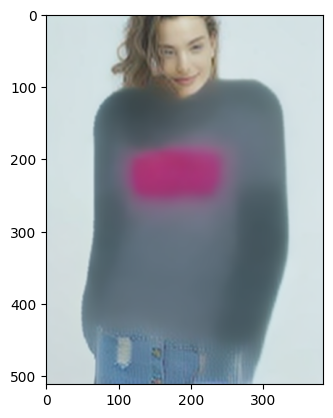

In [4]:
# 正常的inpaint model使用warped_masked_real_image
real_image_path = "/home/nervld/gitclone/diffusers/data/catvton/real_images/00000_00.jpg"
real_mask_path = "/home/nervld/gitclone/diffusers/data/catvton/real_masks/00000_00.jpg"
condition_image_path = "/home/nervld/gitclone/diffusers/data/catvton/condition_images/00000_00.jpg"
cloth_warp_image_path = "/home/nervld/gitclone/diffusers/data/catvton/cloth_warp_images/00000_00.jpg"
cloth_warp_mask_path = "/home/nervld/gitclone/diffusers/data/catvton/cloth_warp_masks/00000_00.jpg"

image = Image.open(real_image_path)
mask = Image.open(real_mask_path)
condition_image = Image.open(condition_image_path)
cloth_warp_image = Image.open(cloth_warp_image_path)
cloth_warp_mask = Image.open(cloth_warp_mask_path)

image = run_inference(unet, vae, noise_scheduler, image=image, mask=mask, condition_image=condition_image, cloth_warp_image=cloth_warp_image, cloth_warp_mask=cloth_warp_mask)
# 可视化
plt.imshow(image[0])
plt.show()